<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/machine_learning/lessons/mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
from matplotlib import pyplot as plt
import keras
from keras import layers

In [16]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [19]:
x_train = x_train[:100]
y_train = y_train[:100]
x_test = x_test[:60]
y_test = y_test[:60]

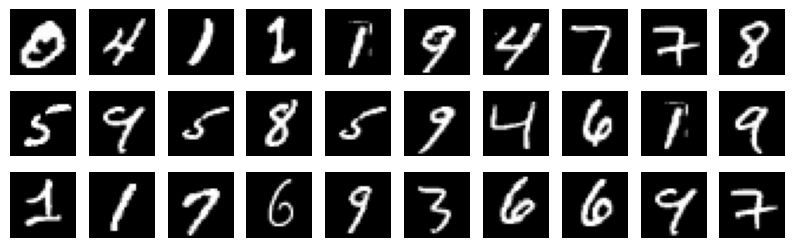

In [20]:
rand_ind = np.random.randint(0, x_train.shape[0], size=30)
fig, axs = plt.subplots(3, 10, figsize=(10, 3))
axs = axs.ravel()
k = 0
for ax in axs:
    ax.axis("off")
    ax.imshow(x_train[rand_ind[k]], cmap='gray')
    k+= 1

In [21]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (100, 28, 28, 1)
100 train samples
60 test samples


In [22]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_5 (Dropout)         (None, 1600)             

In [24]:
batch_size = 128
epochs = 25

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/25
1/1 [==============================] - 2s 2s/step - loss: 1.5155 - accuracy: 0.6444 - val_loss: 1.4304 - val_accuracy: 0.7000
Epoch 2/25
1/1 [==============================] - 0s 36ms/step - loss: 1.4794 - accuracy: 0.6444 - val_loss: 1.3395 - val_accuracy: 0.7000
Epoch 3/25
1/1 [==============================] - 0s 34ms/step - loss: 1.3645 - accuracy: 0.7667 - val_loss: 1.2484 - val_accuracy: 0.8000
Epoch 4/25
1/1 [==============================] - 0s 35ms/step - loss: 1.3445 - accuracy: 0.7111 - val_loss: 1.1603 - val_accuracy: 0.8000
Epoch 5/25
1/1 [==============================] - 0s 43ms/step - loss: 1.2243 - accuracy: 0.7556 - val_loss: 1.0721 - val_accuracy: 0.8000
Epoch 6/25
1/1 [==============================] - 0s 35ms/step - loss: 1.1703 - accuracy: 0.7556 - val_loss: 0.9890 - val_accuracy: 0.9000
Epoch 7/25
1/1 [==============================] - 0s 53ms/step - loss: 1.0663 - accuracy: 0.7889 - val_loss: 0.8998 - val_accuracy: 0.9000
Epoch 8/25
1/1 [=============